ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 50209    9
8573     2
8397     8
65315    9
37694    7
        ..
69870    5
21297    9
10982    1
14874    1
15597    7
Name: class, Length: 52500, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

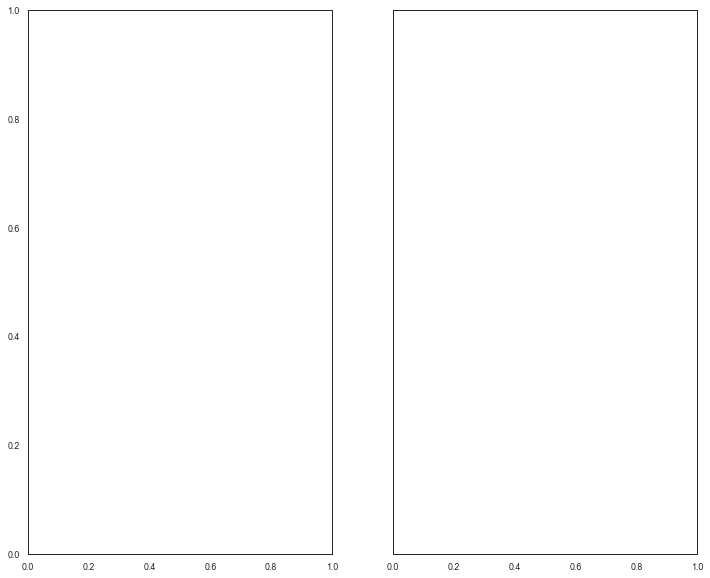

In [2]:
"""
UMAP on the MNIST Digits dataset
--------------------------------
A simple example demonstrating how to use UMAP on a larger
dataset such as MNIST. We first pull the MNIST dataset and
then use UMAP to reduce it to only 2-dimensions for
easy visualisation.
Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import umap

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, stratify=mnist.target, random_state=42
)

reducer = umap.UMAP(random_state=42)
embedding_train = reducer.fit_transform(X_train)
embedding_test = reducer.transform(X_test)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 10))
ax[0].scatter(
    embedding_train[:, 0], embedding_train[:, 1], c=y_train, cmap="Spectral"  # , s=0.1
)
ax[1].scatter(
    embedding_test[:, 0], embedding_test[:, 1], c=y_test, cmap="Spectral"  # , s=0.1
)
plt.setp(ax[0], xticks=[], yticks=[])
plt.setp(ax[1], xticks=[], yticks=[])
plt.suptitle("MNIST data embedded into two dimensions by UMAP", fontsize=18)
ax[0].set_title("Training Set", fontsize=12)
ax[1].set_title("Test Set", fontsize=12)
plt.show()